### Student Information
Name: 楊晶宇

Student ID: 111061516

GitHub ID: gino0950150

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# READ ME

助教好，這次作業有幾個地方想跟助教說明方便批改: <br>

1. first part 的部分重點答案我都有用粗體answer標示<br>
2. second part 我分兩種分析，一種是根據text的來源(amazon、imdb、yelp)，我放在dataframe的"category_name" column，一種是score，我放在"category" column <br>
3. third part 需要安裝wordcloud跑第一題 <br>
4. 礙於sklean版本關係，所有的`get_feature_names_out()`我都是用 `get_feature_names()` <br>
5. 重點我都有用粗體字 <br>

以上，辛苦助教了

# FIRST PART 

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

get category of  0, 2, 7 rows

In [5]:
X.iloc[[0, 2,7], X.columns.get_indexer(['category'])]

category
0         1
2         3
7         2

In [6]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## Answer Here
`.isnull()` didn't work because 'NaN','None',' ' are string, not NONE defintion in python, so they are not null although the out put is same as NONE or NaN

In [9]:
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [10]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [11]:
X_sample = X.sample(n=1000) #random state

In [12]:
len(X_sample)

1000

In [13]:
X_sample[0:4]

text  category  \
1969  From: Mark A. Cartwright <markc@emx.utexas.edu...         1   
1166  From: markmc@halcyon.com (Mark McWiggins) Subj...         2   
452   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
1718  From: brownli@ohsu.edu@ohsu.edu (Liane Brown) ...         3   

               category_name  
1969           comp.graphics  
1166                 sci.med  
452   soc.religion.christian  
1718  soc.religion.christian

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer Here
No changes to the X dataframe. `X.sample()` only sample 1000 rows out into X_smaple, instead of changing X values.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

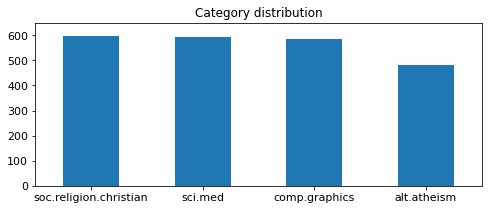

In [15]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [16]:
df_concat = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
df_concat.columns = ["X", "X_sample"]

<AxesSubplot:title={'center':'Category distribution'}>

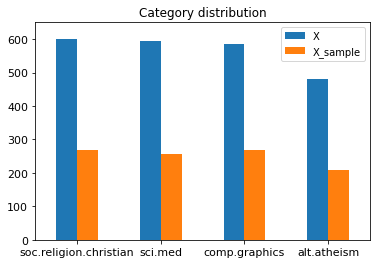

In [17]:
df_concat.plot(kind = 'bar',title = 'Category distribution',ylim = [0, 650], rot = 0, fontsize = 11,)

In [18]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [20]:
arr = X_counts[4].toarray() 
np.where(arr == 1)[-1]

array([    0,    37,   587,   677,  1490,  1540,  1742,  2203,  2521,
        4852,  5698,  5777,  6430,  7280,  8197,  8525,  8544,  9066,
        9067,  9925, 10481, 10874, 11498, 12731, 13239, 14095, 14309,
       14526, 14887, 15406, 15511, 15612, 15822, 16358, 16585, 16642,
       16703, 16916, 16926, 18363, 18551, 19382, 19383, 20253, 20770,
       20842, 20978, 21060, 21176, 23595, 23733, 23741, 23915, 26356,
       26570, 27031, 27352, 27997, 28091, 28771, 29610, 29785, 30068,
       30199, 30250, 31077, 31948, 32139, 32164, 32179, 32202, 32205,
       33741, 34790, 34935, 34982, 35350, 35638, 35648], dtype=int64)

The another 1 is index 37, print it out with `count_vect.get_feature_names()` (my sklearn is higher version, use `get_feature_names()` instead of `get_feature_names_out()`)

In [21]:
count_vect.get_feature_names()[37]

'01'

### Answer is '01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer Here
To visualize a sample of docs, I would only plot those terms counts larger than 0 in doc 4

In [22]:
matrix = X_counts[4].toarray()[-1]
idxs = np.where(matrix  > 0)
idxs = list(idxs[0])

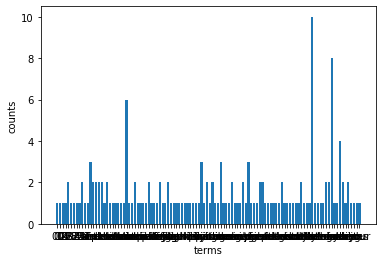

In [23]:
import matplotlib.pyplot as plt
terms = [count_vect.get_feature_names()[i] for i in idxs]
counts = [matrix[i] for i in idxs]
x = np.arange(len(terms))
plt.bar(x, counts)
plt.xticks(x, terms)
plt.xlabel('terms')
plt.ylabel('counts')
plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [24]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

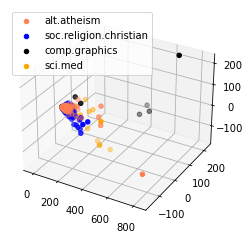

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
col = ['coral', 'blue', 'black', 'orange']

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o', label = category)
    
ax.legend()
plt.show()

### Answer Here
I found that after PCA, a lots of points are close in the 3D dimension, blue points gather more closely than other labels

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [26]:
import plotly.express as px
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df_freq = pd.DataFrame({"Terms":count_vect.get_feature_names()[:300], "Frequencies": term_frequencies[:300]})
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### Answer Here
In order to reduce the number of terms, I only take terms with frequency higher than 1000, observing those terms with higher frequency

In [27]:
idxs = list(np.where(term_frequencies >1000)[0])
df_freq = pd.DataFrame({"Terms":np.take(count_vect.get_feature_names(),idxs), "Frequencies": np.take(term_frequencies,idxs)})
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer Here 
I took those terms with frequencies higher than 500 to plot long tail picture

In [28]:
idxs = list(np.where(term_frequencies > 500)[0])
df_freq = pd.DataFrame({"Terms":np.take(count_vect.get_feature_names(),idxs), "Frequencies": np.take(term_frequencies,idxs)})
df_freq = df_freq.sort_values(by = "Frequencies",ascending= False)
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer Here 
yes, it does as below

In [29]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

# Second Part

## 1. Data Preparation and Transformation

### 1.1 Convert Text File to Datafame
use dictionary d keep all the data and label from files. <br>
use `open()` to read all the text files, use `readlines()` read the lines in files <br>
use `split()` to split text and label <br>
append text, label, path to d

In [30]:
files_path_list = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']
dic_path2categoryName = {'amazon_cells_labelled': 'amazon', 'imdb_labelled':'imdb', 'yelp_labelled': 'yelp'}
d = {"text":[], "category":[], "category_name":[]}
for p in files_path_list:
    f = open('sentiment labelled sentences/' + p + '.txt',encoding="utf-8")
    for line in f.readlines():
        t = line.split("\t")
        d["text"].append(t[0])
        cate = int(t[1].split()[0])
        d["category"].append(cate)
        d["category_name"].append(dic_path2categoryName[p])
    f.close

use `pd.DataFrame()` to transform d into Dataframe

In [31]:
X = pd.DataFrame(d)
X.head()

text  category category_name
0  So there is no way for me to plug it in here i...         0        amazon
1                        Good case, Excellent value.         1        amazon
2                             Great for the jawbone.         1        amazon
3  Tied to charger for conversations lasting more...         0        amazon
4                                  The mic is great.         1        amazon

print X shape

In [32]:
len(X)

3000

### 1.2 Familiarizing yourself with the Data

In [33]:
X[:10][["text","category_name"]]

text category_name
0  So there is no way for me to plug it in here i...        amazon
1                        Good case, Excellent value.        amazon
2                             Great for the jawbone.        amazon
3  Tied to charger for conversations lasting more...        amazon
4                                  The mic is great.        amazon
5  I have to jiggle the plug to get it to line up...        amazon
6  If you have several dozen or several hundred c...        amazon
7        If you are Razr owner...you must have this!        amazon
8                Needless to say, I wasted my money.        amazon
9                   What a waste of money and time!.        amazon

In [34]:
X[-10:]

text  category  \
2990  The refried beans that came with my meal were ...         0   
2991         Spend your money and time some place else.         0   
2992  A lady at the table next to us found a live gr...         0   
2993            the presentation of the food was awful.         0   
2994           I can't tell you how disappointed I was.         0   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

     category_name  
2990          yelp  
2991          yelp  
2992          yelp  
2993          yelp  
2994          yelp  
2995          yelp  
2996          yelp  
2997          yelp  
2998          yelp  
2999          yelp

In [35]:
X.loc[:10, 'text']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: text, dtype: object

In [36]:
X.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [37]:
X.iloc[[0, 2,7], X.columns.get_indexer(['category'])]

category
0         0
2         1
7         1

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```amazon``` category, and query every 10th record. Only show the first 5 records.

In [38]:
X[X.category_name == 'amazon'].iloc[lambda x: x.index % 10 == 0][:5]

text  category category_name
0   So there is no way for me to plug it in here i...         0        amazon
10                    And the sound quality is great.         1        amazon
20  I went on Motorola's website and followed all ...         0        amazon
30  This is a simple little phone to use, but the ...         0        amazon
40  It has a great camera thats 2MP, and the pics ...         1        amazon

## 2. Data Mining using Pandas

### 4.1 Missing Values

In [39]:
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2995  False     False          False
2996  False     False          False
2997  False     False          False
2998  False     False          False
2999  False     False          False

[3000 rows x 3 columns]

In [40]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [41]:
X.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

#### add dummy record with missing value and drop it

In [42]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [43]:
dummy_series

text        dummy_record
category               1
dtype: object

In [44]:
dummy_series.to_frame().T

text category
0  dummy_record        1

In [45]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [46]:
len(result_with_series)

3001

In [47]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [48]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [49]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [50]:
len(X)

3001

In [51]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [52]:
X.dropna(inplace=True)

In [53]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [54]:
len(X)

3000

### 4.2 Dealing with Duplicate Data

In [55]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

#### there are 17 duplicate data!

In [56]:
sum(X.duplicated())

17

In [57]:
sum(X.duplicated('text'))

17

drop all duplicate data

In [58]:
X.drop_duplicates(keep=False, inplace=True)

In [59]:
len(X)

2966

## 3.  Data Preprocessing

### 3.1 Sampling

In [60]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [61]:
X_sample[0:4]

text  category  \
1460  I know he was a contract player with little co...         0   
487   Unfortunately the ability to actually know you...         0   
2651  Great place to relax and have an awesome burge...         1   
2237  I'd say that would be the hardest decision... ...         1   

     category_name  
1460          imdb  
487         amazon  
2651          yelp  
2237          yelp

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
categories = list(dic_path2categoryName.values())

In [64]:
categories

['amazon', 'imdb', 'yelp']

#### print category name distribution

imdb      994
yelp      992
amazon    980
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category name distribution'}>

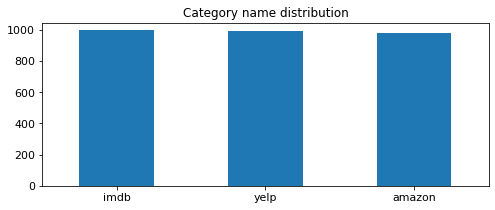

In [65]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category name distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

#### print category(score) distribution

0    1486
1    1480
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category(score) distribution'}>

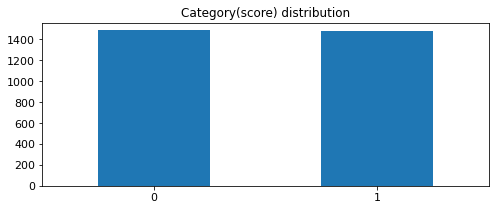

In [66]:
print(X.category.value_counts())
X.category.value_counts().plot(kind = 'bar',
                                    title = 'Category(score) distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

#### print category name distribution

imdb      334
amazon    333
yelp      333
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

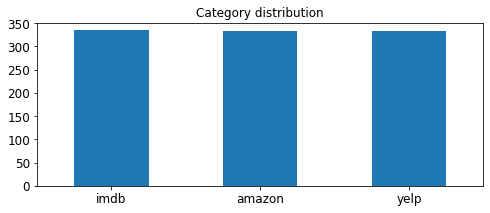

In [67]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

imdb      334
amazon    333
yelp      333
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

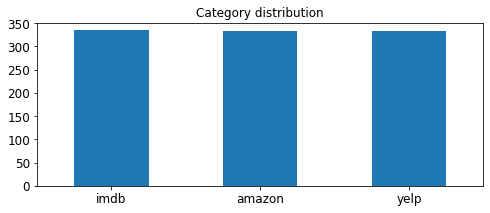

In [68]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution', 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'Category_name distribution'}>

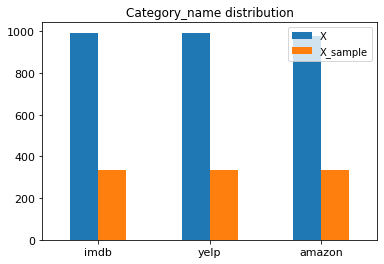

In [69]:
df_concat = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
df_concat.columns = ["X", "X_sample"]
df_concat.plot(kind = 'bar',title = 'Category_name distribution', rot = 0, fontsize = 11,)

<AxesSubplot:title={'center':'Category(score) distribution'}>

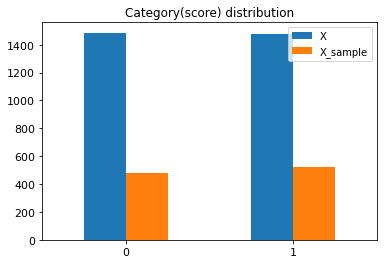

In [70]:
df_concat = pd.concat([X.category.value_counts(), X_sample.category.value_counts()], axis=1)
df_concat.columns = ["X", "X_sample"]
df_concat.plot(kind = 'bar',title = 'Category(score) distribution', rot = 0, fontsize = 11,)

### 3.2 Feature Creation

In [71]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]
X[0:4]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0        amazon   
1                        Good case, Excellent value.         1        amazon   
2                             Great for the jawbone.         1        amazon   
3  Tied to charger for conversations lasting more...         0        amazon   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [72]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 3.3 Feature subset selection

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [74]:
analyze = count_vect.build_analyzer()
analyze(X.iloc[0]['text'])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [75]:
X_counts.shape

(2966, 5153)

In [76]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [77]:
count_vect.get_feature_names()[0:1]

['00']

In [78]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[40:60]]

In [79]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[40:60]]

In [80]:
plot_z = X_counts[40:60, 40:60].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

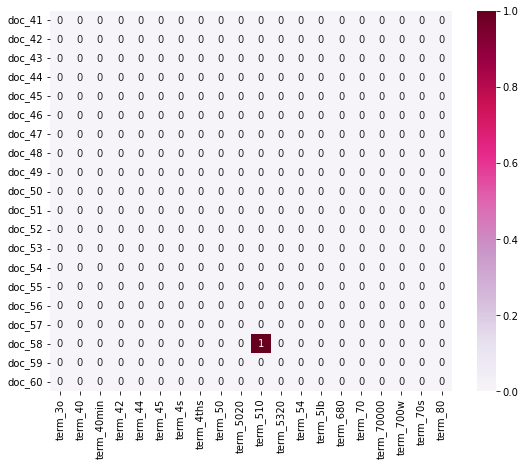

In [81]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

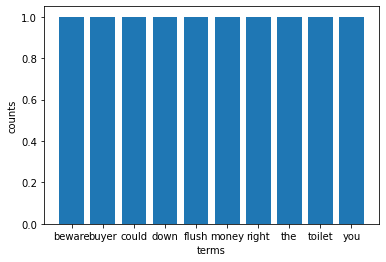

In [82]:
matrix = X_counts[100].toarray()[-1]
idxs = np.where(matrix  > 0)
idxs = list(idxs[0])
import matplotlib.pyplot as plt
terms = [count_vect.get_feature_names()[i] for i in idxs]
counts = [matrix[i] for i in idxs]
x = np.arange(len(terms))
plt.bar(x, counts)
plt.xticks(x, terms)
plt.xlabel('terms')
plt.ylabel('counts')
plt.show()

### 3.4 Dimensionality Reduction

In [83]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2966, 2)

In [84]:
categories

['amazon', 'imdb', 'yelp']

#### plot 2D and 3D distribution according to category_name

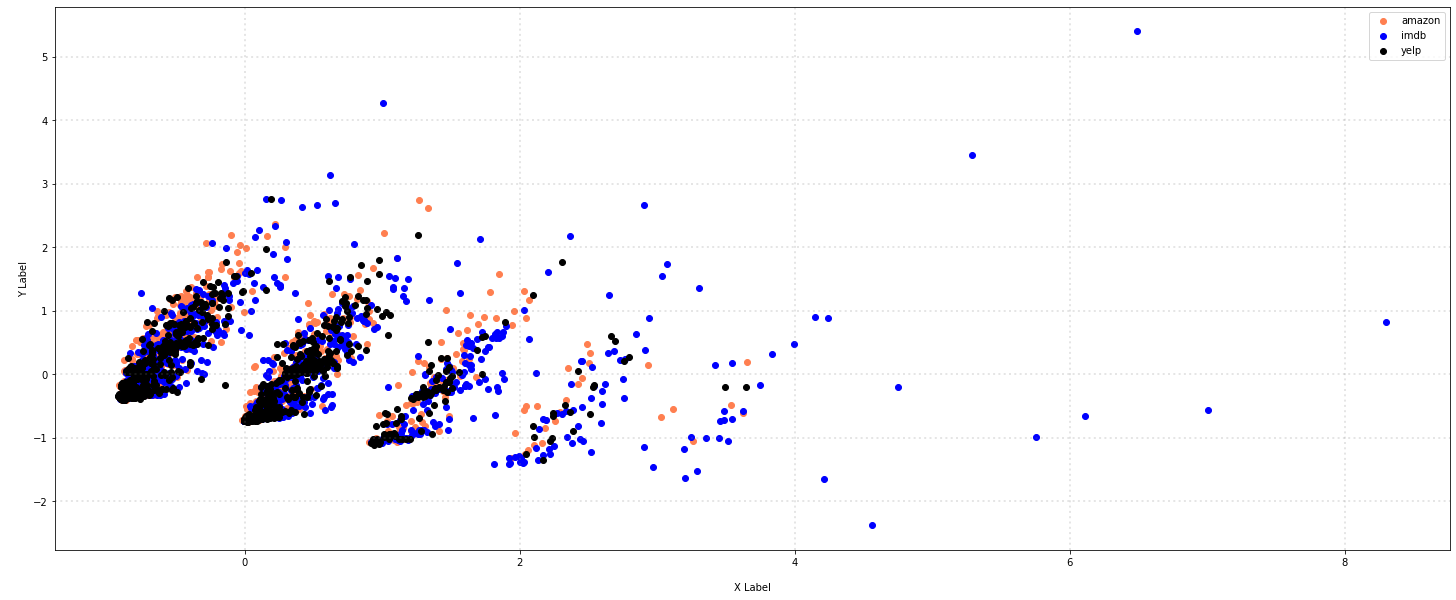

In [85]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', label = category)

ax.legend()
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [86]:
# Answer herefig = plt.figure()
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

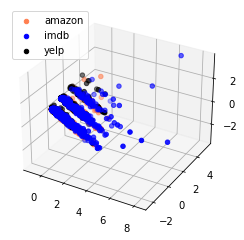

In [87]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
col = ['coral', 'blue', 'black', 'orange']

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o', label = category)
    
ax.legend()
plt.show()

#### plot 2D and 3D distribution according to category(score)

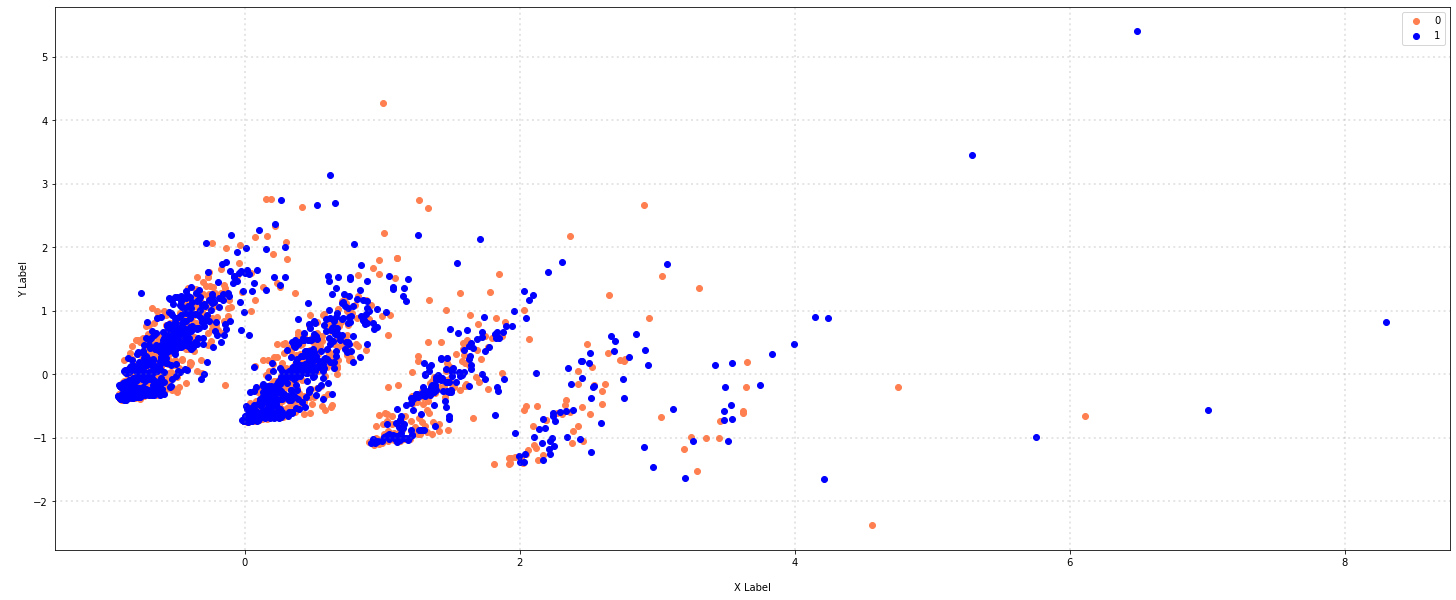

In [88]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue']
cate = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, cate):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', label = category)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend()

plt.show()

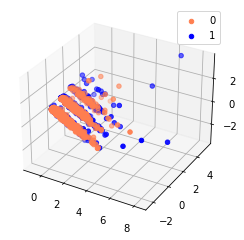

In [89]:
# Answer herefig = plt.figure()
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
col = ['coral', 'blue']

for c, category in zip(col, cate):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
    zs = X_reduced[X['category'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o', label = category)
    
ax.legend()
plt.show()

### 5.5 Attribute Transformation / Aggregation

In [90]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

1

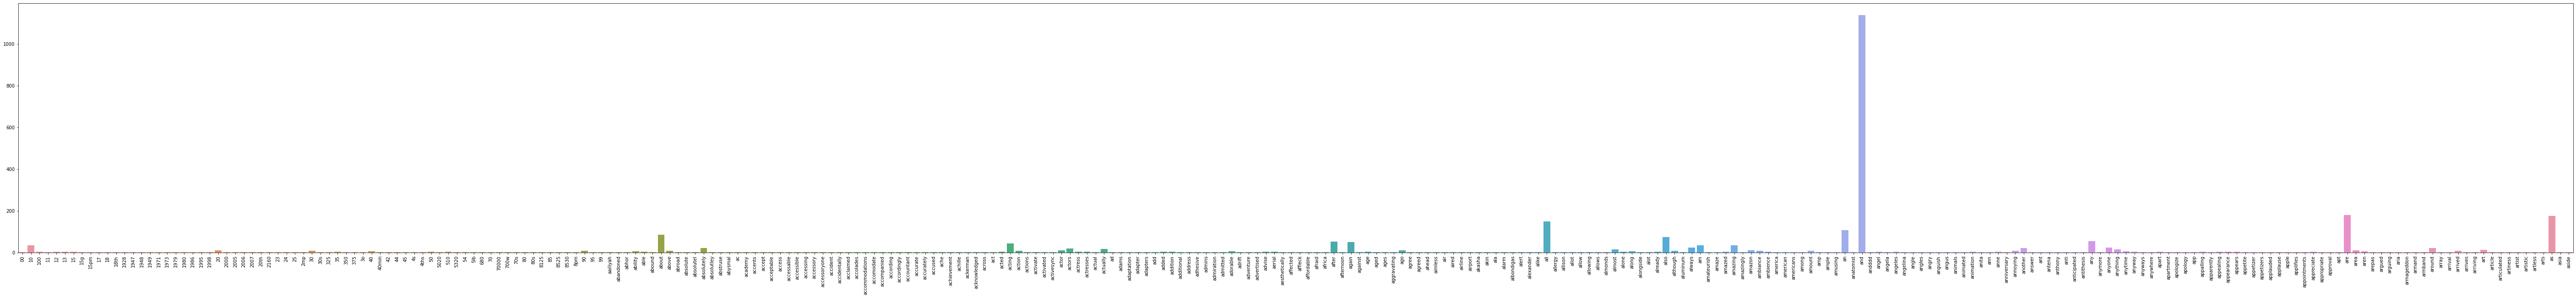

In [91]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [92]:
import plotly.express as px
df_freq = pd.DataFrame({"Terms":count_vect.get_feature_names()[:300], "Frequencies": term_frequencies[:300]})
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


##### plot terms with freq > 100

In [93]:
idxs = list(np.where(term_frequencies >100)[0])
df_freq = pd.DataFrame({"Terms":np.take(count_vect.get_feature_names(),idxs), "Frequencies": np.take(term_frequencies,idxs)})
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

I took those terms with frequencies higher than 500 to plot long tail picture

In [94]:
idxs = list(np.where(term_frequencies >100)[0])
df_freq = pd.DataFrame({"Terms":np.take(count_vect.get_feature_names(),idxs), "Frequencies": np.take(term_frequencies,idxs)})
df_freq = df_freq.sort_values(by = "Frequencies",ascending= False)
px.bar(data_frame=df_freq, x="Terms", y="Frequencies")

#### change to  log distribution

In [95]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

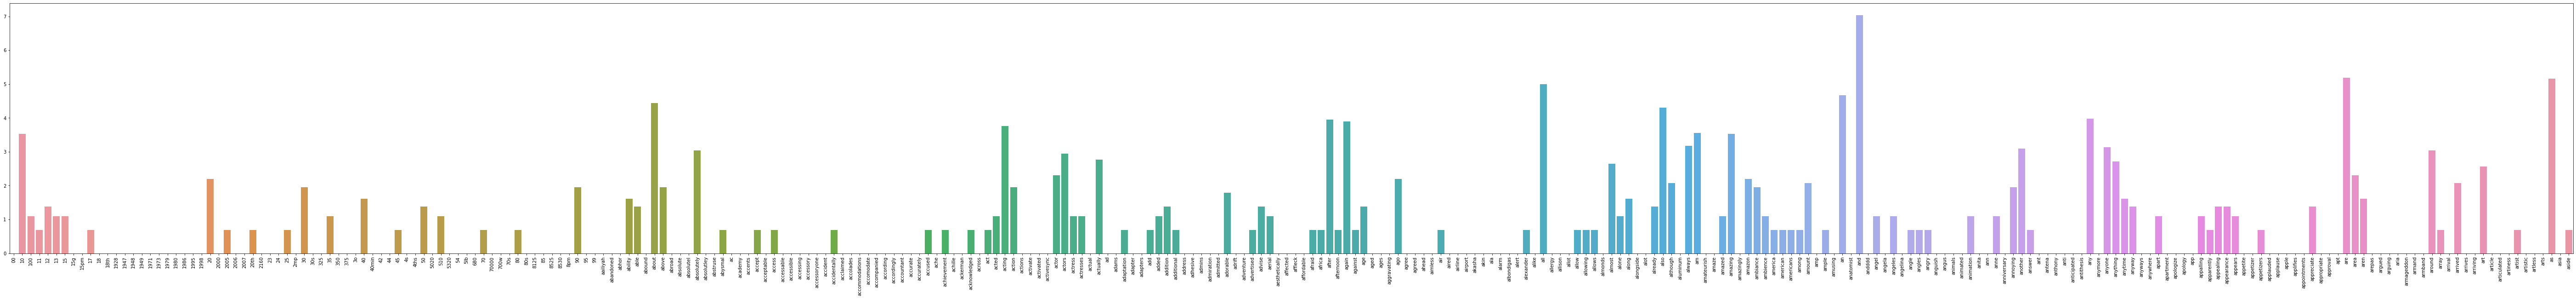

In [96]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 3.6 Discretization and Binarization

In [97]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0        amazon   
1                        Good case, Excellent value.         1        amazon   
2                             Great for the jawbone.         1        amazon   
3  Tied to charger for conversations lasting more...         0        amazon   
4                                  The mic is great.         1        amazon   
5  I have to jiggle the plug to get it to line up...         0        amazon   
6  If you have several dozen or several hundred c...         0        amazon   
7        If you are Razr owner...you must have this!         1        amazon   
8                Needless to say, I wasted my money.         0        amazon   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...       [0, 0]  
1               [Good, case, ,, Excellent, value, .]       [0, 0]  
2                      [Great, for, the, jawbone, .]       [0, 0]  
3  [Tied, to, charger, for, conversations, lastin...       [0, 0]  
4                           [The, mic, is, great, .]       [0, 0]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0, 0]  
6  [If, you, have, several, dozen, or, several, h...       [0, 0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [0, 0]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0, 0]

# 4. Data Exploration

In [98]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[40]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[90]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [99]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['I was not impressed by this product.']
['Made very sturdy.']
['Audio Quality is poor, very poor.']


In [100]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


#### calculate cosine similarity

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.204124
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third Part

### 1.Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

### please install wordcloud
A word cloud is a text visualization technique that focuses on the frequency of words and correlates the size and opacity of a word to its frequency within a body of text. The output is usually an image that depicts different words in different sizes and opacities relative to the word frequency.

In [102]:
! pip install wordcloud

### collect all text in X 

In [103]:
from wordcloud import WordCloud, STOPWORDS 

text_total = ""
for index, row in X.iterrows():
    text_total  += row["text"]

In [104]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = STOPWORDS).generate(text_total)

#### generate wordcloud plot of all text in X (Dateframe)

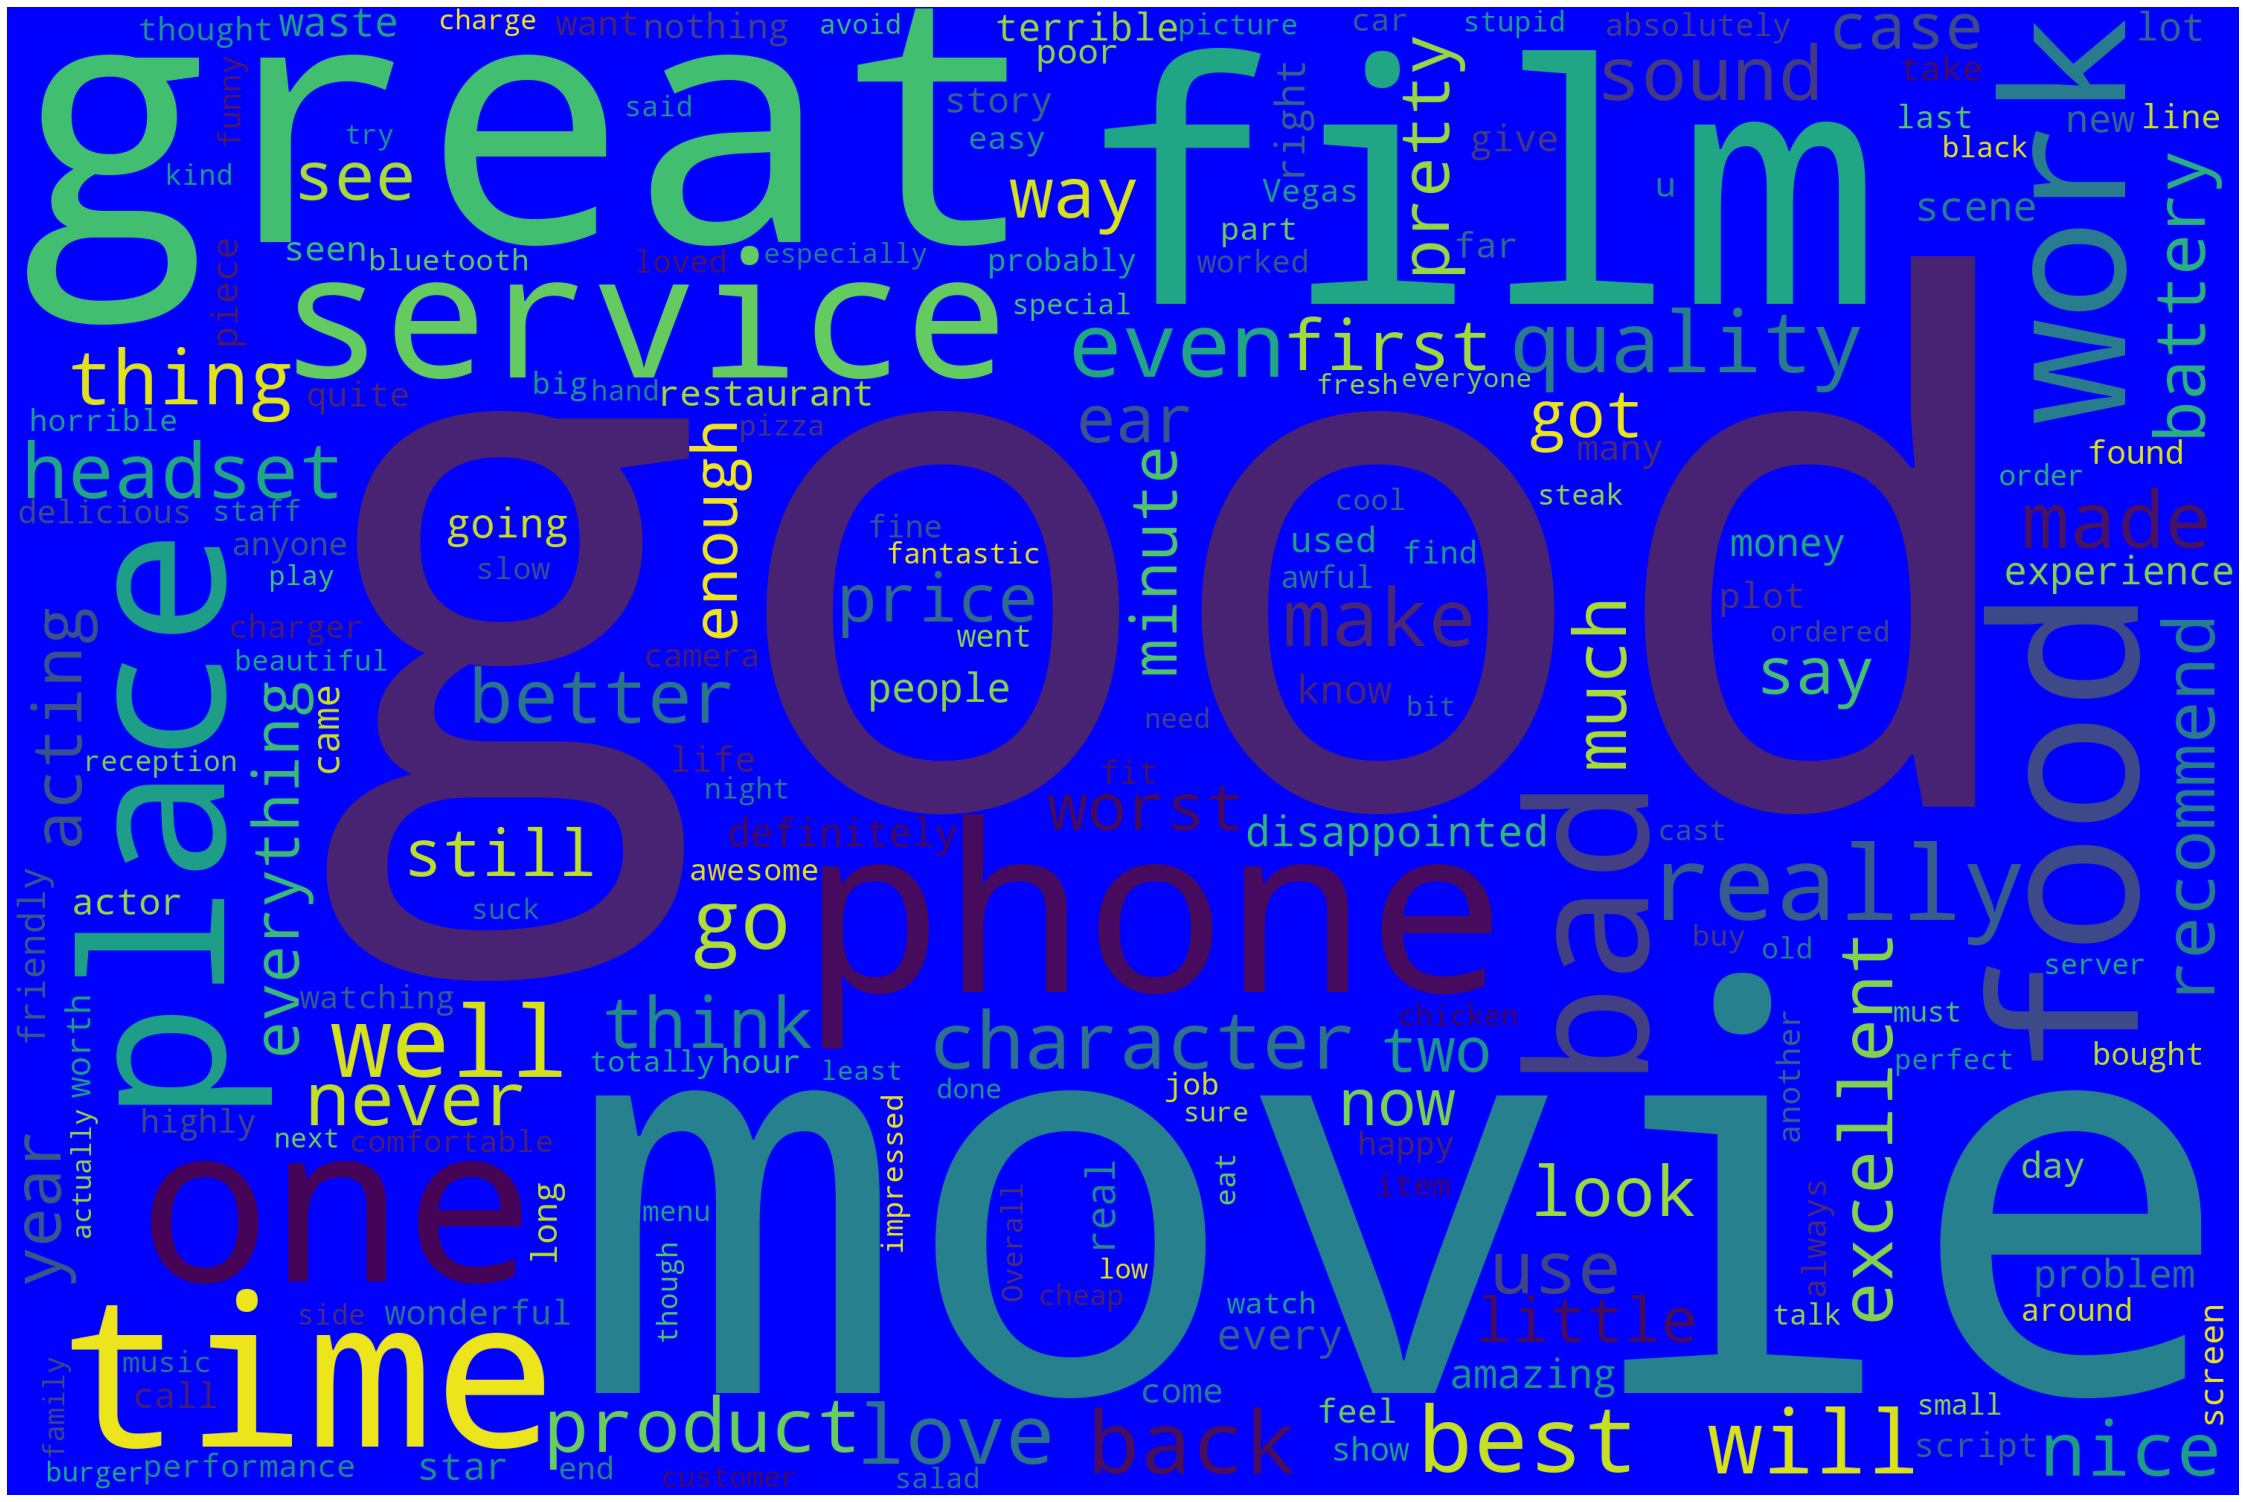

In [105]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)  
plt.axis("off")
plt.show()


### 2.Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_tfidf[0])

  (0, 1012)	0.3986168387492481
  (0, 646)	0.22333547273087015
  (0, 1981)	0.23146985374950851
  (0, 4791)	0.3320558096799929
  (0, 4833)	0.27546430092514007
  (0, 4529)	0.08650236048704857
  (0, 2157)	0.2227159333830498
  (0, 2313)	0.2951617172401695
  (0, 2431)	0.11953102323931236
  (0, 3385)	0.30874481545976773
  (0, 4607)	0.12738906128503263
  (0, 2808)	0.22860251631494138
  (0, 1828)	0.15661880776106893
  (0, 4985)	0.24912565648943613
  (0, 3042)	0.22333547273087015
  (0, 2426)	0.12069328594000049
  (0, 4543)	0.2075378632582399
  (0, 4159)	0.1873278991359609


#### plot doc- term-tfidf matrix

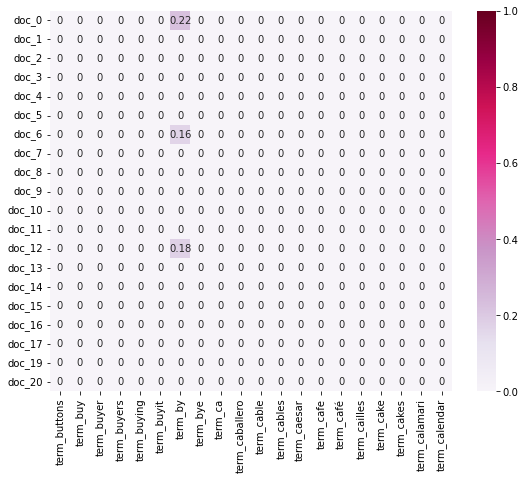

In [117]:
plot_x = ["term_"+str(i) for i in tfidf_vect.get_feature_names()[640:660]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_tfidf[0:20, 640:660].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 3.Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

In [154]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

#### classify records by tfidf

In [155]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, X['category'], test_size=0.3, random_state=100)
print(X_train)

  (0, 3493)	0.2723947541164248
  (0, 3989)	0.2192574373434659
  (0, 3192)	0.2723947541164248
  (0, 4279)	0.26247122357334707
  (0, 2686)	0.24316739863689238
  (0, 4813)	0.24316739863689238
  (0, 1876)	0.19296758194812194
  (0, 3163)	0.3564459871780675
  (0, 3011)	0.24848479282299826
  (0, 1523)	0.20695401269847075
  (0, 1579)	0.16000742239358673
  (0, 3031)	0.17269200873544766
  (0, 2663)	0.1866784394857965
  (0, 5067)	0.11808090428522994
  (0, 179)	0.1408301839573059
  (0, 4562)	0.20872336373648248
  (0, 4888)	0.12300704910585424
  (0, 4966)	0.09585067028126316
  (0, 2121)	0.34798770628787107
  (0, 216)	0.14814138613354746
  (0, 3096)	0.09313731412029852
  (0, 4529)	0.062146517863579505
  (1, 2726)	0.33851360136375763
  (1, 3989)	0.2724781722822822
  (1, 1821)	0.18037960040486842
  :	:
  (2073, 3121)	0.2089301253297729
  (2073, 3096)	0.15442761893941287
  (2074, 3199)	0.5459570289575295
  (2074, 4893)	0.5459570289575295
  (2074, 5008)	0.5459570289575295
  (2074, 1882)	0.32525800158582

In [156]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8191011235955056

#### classify records by word frequency

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X['category'], test_size=0.3, random_state=100)
print(X_train[0])

  (0, 4529)	1
  (0, 3096)	1
  (0, 216)	2
  (0, 2121)	2
  (0, 4966)	1
  (0, 4888)	1
  (0, 4562)	1
  (0, 179)	1
  (0, 5067)	1
  (0, 2663)	1
  (0, 3031)	1
  (0, 1579)	1
  (0, 1523)	1
  (0, 3011)	1
  (0, 3163)	2
  (0, 1876)	1
  (0, 4813)	1
  (0, 2686)	1
  (0, 4279)	1
  (0, 3192)	1
  (0, 3989)	1
  (0, 3493)	1


In [158]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8191011235955056

#### comment on the differences

The result of the two classifier is almost the same, although the training input is different. The main differnce between tfidf and word frequency is idf, Inverse Document Frequency, which lower the importance of words with very high frequency but not significant like "the", "an". However, all the document in our task is very short, the difference cause by idf lower accordingly

# Fourth Part 
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

### original coding style in lab

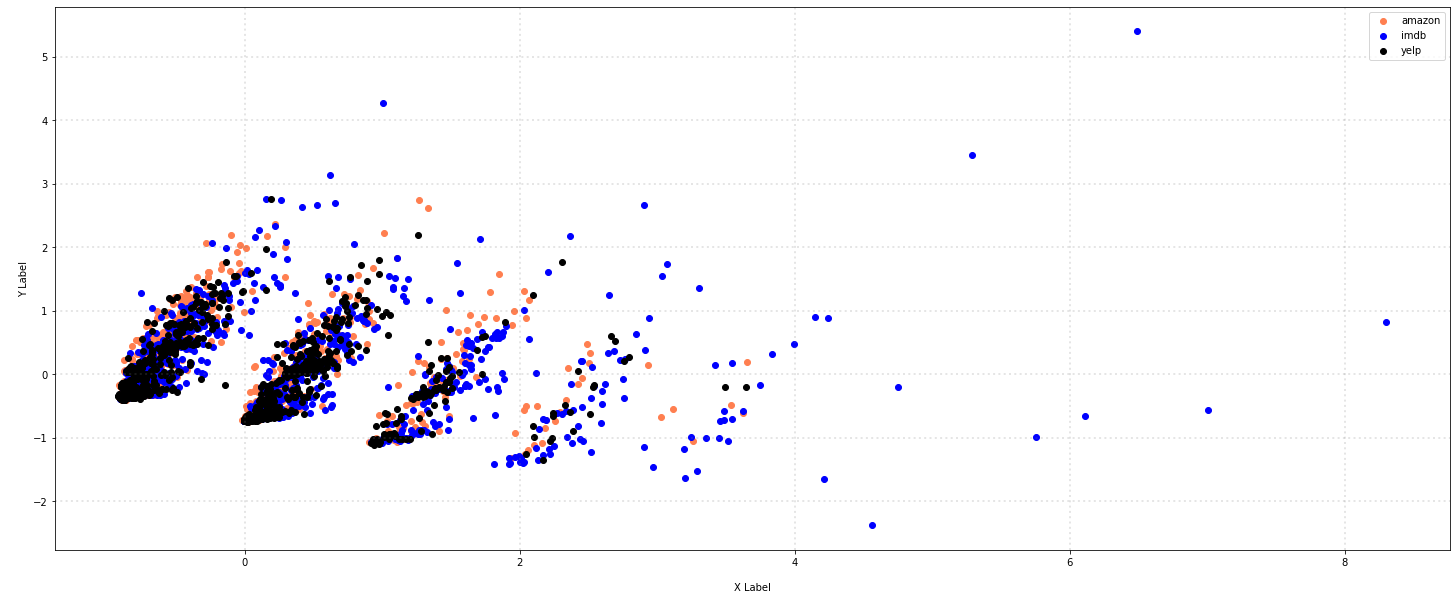

In [221]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', label = category)

ax.legend()
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### improve the code by using `sns.scatterplot`

first, I reset index of X["category_name"], and make X_reduced a new dataframe.<br>
finally, concat them and plot it by sns

<AxesSubplot:xlabel='0', ylabel='1'>

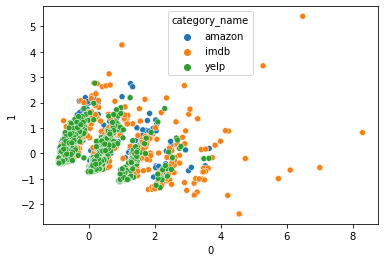

In [225]:
X_catename= X["category_name"].reset_index()
X_reduced = pd.DataFrame(X_reduced)
df_reduced = pd.concat([X_reduced, X_catename], axis= 1)
sns.scatterplot(data=df_reduced, x=0, y=1, hue="category_name")